<a href="https://colab.research.google.com/github/YifanSong348/STATS302/blob/main/Week%204/Hitters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#STATS302 HW 4 - Yifan Song
###Problem 1. Trees and forests
[ISL] 8.4 - 10

In [2]:
import pandas as pd
import numpy as np
from google.colab import files
import io

import sklearn.linear_model as skl_lm
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import ensemble

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error

import statsmodels.api as sm
from statsmodels.api import OLS

import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# import dataset
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['Hitters.csv']))

Saving Hitters.csv to Hitters.csv


In [4]:
df = df.rename(columns={'Unnamed: 0': 'Name'})
# df = data.drop(data.columns[0], axis=1)
print(df.shape)
print(df.head())
print(df.columns)

(322, 21)
                Name  AtBat  Hits  HmRun  ...  Assists  Errors  Salary  NewLeague
0     -Andy Allanson    293    66      1  ...       33      20     NaN          A
1        -Alan Ashby    315    81      7  ...       43      10   475.0          N
2       -Alvin Davis    479   130     18  ...       82      14   480.0          A
3      -Andre Dawson    496   141     20  ...       11       3   500.0          N
4  -Andres Galarraga    321    87     10  ...       40       4    91.5          N

[5 rows x 21 columns]
Index(['Name', 'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years',
       'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League',
       'Division', 'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')


# a.  Remove the observations for whom the salary information is unknown, and then log-transform the salaries.



> Remove NaN



In [6]:
print("Contents of the Dataframe : ")
print(df)
# Drop rows which contain any NaN value in the "Salary" column
df = df.dropna(how='any', subset=['Salary'])
print("Modified Dataframe : ")
print(df)

Contents of the Dataframe : 
                  Name  AtBat  Hits  HmRun  ...  Assists  Errors  Salary  NewLeague
0       -Andy Allanson    293    66      1  ...       33      20     NaN          A
1          -Alan Ashby    315    81      7  ...       43      10   475.0          N
2         -Alvin Davis    479   130     18  ...       82      14   480.0          A
3        -Andre Dawson    496   141     20  ...       11       3   500.0          N
4    -Andres Galarraga    321    87     10  ...       40       4    91.5          N
..                 ...    ...   ...    ...  ...      ...     ...     ...        ...
317      -Willie McGee    497   127      7  ...        9       3   700.0          N
318   -Willie Randolph    492   136      5  ...      381      20   875.0          A
319    -Wayne Tolleson    475   126      3  ...      113       7   385.0          A
320     -Willie Upshaw    573   144      9  ...      131      12   960.0          A
321     -Willie Wilson    631   170      9  ...

In [7]:
df['League'] = df['League'].map({'N': 1, 'A': 0})
df['NewLeague'] = df['NewLeague'].map({'N': 1, 'A': 0})
df['Division'] = df['Division'].map({'W': 1, 'E': 0})
df.head()

,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,475.0,1
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,480.0,0
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,500.0,1
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,91.5,1
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,750.0,0


In [8]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,0.471483,0.509506,290.711027,118.760456,8.593156,535.925882,0.463878
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,0.500138,0.500863,279.934575,145.080577,6.606574,451.118681,0.499644
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000,0.000000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,0.000000,0.000000,113.500000,8.000000,3.000000,190.000000,0.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,0.000000,1.000000,224.000000,45.000000,7.000000,425.000000,0.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,1.000000,1.000000,322.500000,192.000000,13.000000,750.000000,1.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1.000000,1.000000,1377.000000,492.000000,32.000000,2460.000000,1.000000




> log-transform the salaries


In [11]:
df['log_Salary'] = np.log(df['Salary'])
print(df)

                  Name  AtBat  Hits  ...  Salary  NewLeague  log_Salary
1          -Alan Ashby    315    81  ...   475.0          1    6.163315
2         -Alvin Davis    479   130  ...   480.0          0    6.173786
3        -Andre Dawson    496   141  ...   500.0          1    6.214608
4    -Andres Galarraga    321    87  ...    91.5          1    4.516339
5     -Alfredo Griffin    594   169  ...   750.0          0    6.620073
..                 ...    ...   ...  ...     ...        ...         ...
317      -Willie McGee    497   127  ...   700.0          1    6.551080
318   -Willie Randolph    492   136  ...   875.0          0    6.774224
319    -Wayne Tolleson    475   126  ...   385.0          0    5.953243
320     -Willie Upshaw    573   144  ...   960.0          0    6.866933
321     -Willie Wilson    631   170  ...  1000.0          0    6.907755

[263 rows x 22 columns]


# b. Create a training set consisting of the first 200 observations, and a test set consisting of the remaining observations.

In [12]:
Training_set = df.iloc[0:200, :]
Test_set = df.iloc[200:, :]
print(Training_set)
print(Test_set)

                  Name  AtBat  Hits  ...  Salary  NewLeague  log_Salary
1          -Alan Ashby    315    81  ...   475.0          1    6.163315
2         -Alvin Davis    479   130  ...   480.0          0    6.173786
3        -Andre Dawson    496   141  ...   500.0          1    6.214608
4    -Andres Galarraga    321    87  ...    91.5          1    4.516339
5     -Alfredo Griffin    594   169  ...   750.0          0    6.620073
..                 ...    ...   ...  ...     ...        ...         ...
243           -Ron Cey    256    70  ...  1050.0          0    6.956545
244          -Rob Deer    466   108  ...   215.0          0    5.370638
245      -Rick Dempsey    327    68  ...   400.0          0    5.991465
247        -Ron Hassey    341   110  ...   560.0          0    6.327937
248  -Rickey Henderson    608   160  ...  1670.0          0    7.420579

[200 rows x 22 columns]
                 Name  AtBat  Hits  ...  Salary  NewLeague  log_Salary
249   -Reggie Jackson    419   101  ... 

# c. Perform boosting on the training set with 1,000 trees for a range of values of the shrinkage parameter λ. Produce a plot with different shrinkage values on the x-axis and the corresponding training set MSE on the y-axis.
# d. Produce a plot with different shrinkage values on the x-axis and the corresponding test set MSE on the y-axis.


> Boosting (1000 trees with varying shrinkage)



In [13]:
def boosting_shrinkage(X_train, Y_train, X_test, Y_test, shrinkages):
    train_MSE = {}
    test_MSE = {}
    for s in shrinkages:
        clf = GradientBoostingRegressor(random_state=0, n_estimators=1000, learning_rate=s)
        clf.fit(X_train, Y_train)
        p = clf.predict(X_train)
        train_MSE[s] = mean_squared_error(p, Y_train)
        p = clf.predict(X_test)
        test_MSE[s] = mean_squared_error(p, Y_test)
    return (train_MSE, test_MSE)

X_train = Training_set.drop(['Name', 'Salary', 'log_Salary'], axis=1)
y_train = Training_set[['log_Salary']]
X_test = Test_set.drop(['Name', 'Salary', 'log_Salary'], axis=1)
y_test = Test_set[['log_Salary']]

res = boosting_shrinkage(X_train, y_train.values.ravel(), X_test, y_test.values.ravel(),
                               np.linspace(0.001, 0.5, 100))



> Plot (c., d. together)



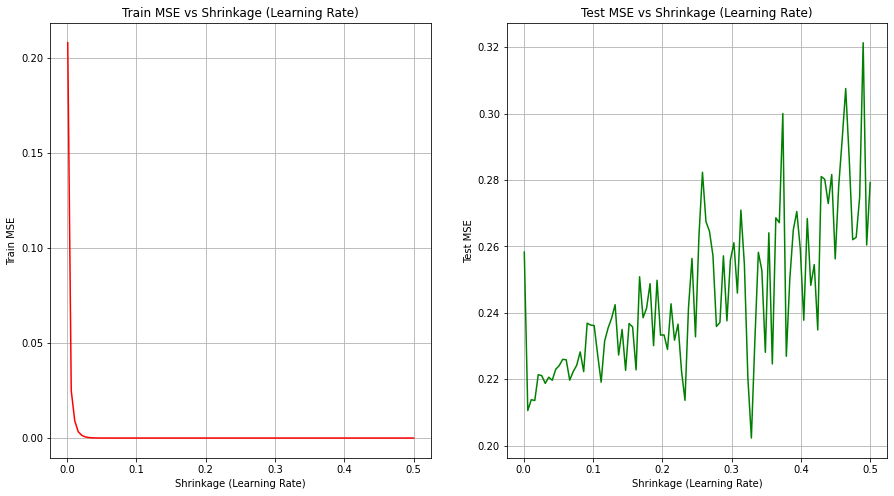

In [14]:
fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(121)
lists = sorted(res[0].items())
x, y = zip(*lists)
plt.plot(x, y, color='r', label='Training Error')

ax.set_xlabel('Shrinkage (Learning Rate)')
ax.set_ylabel('Train MSE')
ax.set_title('Train MSE vs Shrinkage (Learning Rate)')
ax.grid()

ax = fig.add_subplot(122)
lists = sorted(res[1].items())
x, y = zip(*lists)
plt.plot(x, y, color='g', label='Test Error')

ax.set_xlabel('Shrinkage (Learning Rate)')
ax.set_ylabel('Test MSE')
ax.set_title('Test MSE vs Shrinkage (Learning Rate)')
ax.grid()

plt.grid(b=True)
plt.show()

# e. Compare the test MSE of boosting to the test MSE that results from applying two of the regression approaches seen in Chapters 3 and 6.

Here I choose the linear model and regularization model (Lasso) to compare with boosting.



> Boosting



In [15]:
parameters = {'learning_rate': np.linspace(0.001, 0.5, 20), 'n_estimators': np.arange(1, 40, 2)}
# parameters = {'learning_rate': np.linspace(0.001, 0.5, 20), 'n_estimators': np.arange(100, 1000, 10)}
clf = GridSearchCV(ensemble.GradientBoostingRegressor(random_state=0), parameters, n_jobs=4, cv=10)
clf.fit(X=X_train, y=y_train.values.ravel())
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.7156560970841344 {'learning_rate': 0.15857894736842104, 'n_estimators': 15}


We can see that the best boosted model is the one with learning rate of 0.1586 and uses 15 trees. 

In [16]:
y_pred1 = tree_model.predict(X_test)
print("Test MSE of Boosting: ", mean_squared_error(y_pred1, y_test))

Test MSE of Boosting:  0.21640274598049566


> Linear model



In [17]:
regressor = LinearRegression()
model_linear = regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
r_sq = regressor.score(X_train, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', regressor.intercept_)
print('slope:', regressor.coef_)

coefficient of determination: 0.6149418244386136
intercept: [4.45317794]
slope: [[-4.15113750e-03  1.89963794e-02  9.44262464e-03 -2.99605926e-03
  -2.60303603e-03  1.13452449e-02  6.86664311e-02  1.47864378e-04
  -1.20854106e-03  4.08525317e-04  2.52677750e-03  3.62488858e-04
  -1.61406640e-03  1.48796578e-01 -1.35939807e-01  5.63114332e-04
   8.93621525e-04 -9.94967408e-03 -3.15309469e-02]]


In [18]:
y_pred2 = model_linear.predict(X_test)
print('Test MSE of Linear Regression Model:', metrics.mean_squared_error(y_test, y_pred2))

Test MSE of Linear Regression Model: 0.49179593754549367


> Lasso model

In [19]:
# perform 10-fold cross-validation to choose the best lambda (alpha)
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

print('Intercept is ', lassocv.intercept_)
print('Coef are ', lassocv.coef_)
print('Lambda is ', lassocv.alpha_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Intercept is  4.410340213473163
Coef are  [-0.00200676  0.01140031  0.00099862  0.00103039 -0.          0.00700314
  0.06048304  0.          0.          0.00133516  0.00069333  0.
 -0.00058412  0.10631244 -0.14398887  0.00047716  0.000637   -0.00835246
 -0.        ]
Lambda is  0.00038130639604907216


In [20]:
# fit the model using the lambda
lasso = Lasso(alpha = lassocv.alpha_, normalize = True)
model_Lasso = lasso.fit(X_train, y_train)

In [21]:
y_pred3 = model_Lasso.predict(X_test)
print('Test MSE of Lasso model:', metrics.mean_squared_error(y_test, y_pred3))

Test MSE of Lasso model: 0.46868356354602325


We find that other regression approaches we chose (linear and Lasso) have sgnificantly larger test MSE than Boosting. Thus the improvement in the test MSE for Boosting over the other regression approaches appears to be quite large.

# f. Which variables appear to be the most important predictors in the boosted model?

From e. we know that the best boosted model is the one with learning rate of 0.1586 and uses 15 trees. The bar graph showing the importance of various features in the model is shown below.

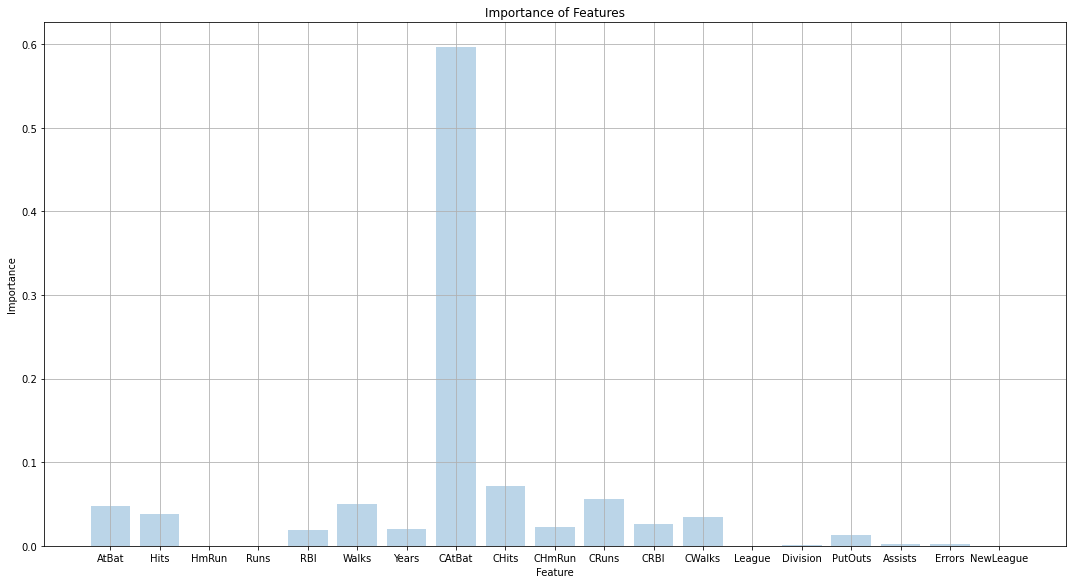

In [22]:
feature_importances = tree_model.feature_importances_

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

plt.bar(X_train.columns.tolist(), feature_importances, alpha=0.3)

ax.set_xlabel('Feature')
ax.set_ylabel('Importance')
plt.tight_layout()
plt.title("Importance of Features")
plt.grid()
plt.show()

We can see from the variable importance ranking that “CAtBat = Number of times at bat during his career” is the most important variable in the model by some margin. After that, CHits, CRuns, Walks and AtBat are all of similar importance. The most important variables are all ‘career’ variables.

In [23]:
# feature_importances = tree_model.feature_importances_
# importance = pd.DataFrame({'Feature': 'AtBat', 'Importance': [tree_model.feature_importances_]})
# tree_df = importance.append(pd.DataFrame({'Feature': X_train.columns, 'importance': tree_model.feature_importances_}), ignore_index = True)
# # intercept = pd.DataFrame({'feature': 'Intercept', 'coefficient': [model_Lasso.intercept_]})
# # lasso_df  = intercept.append(pd.DataFrame({'feature': X.columns, 'coefficient': model_Lasso.coef_}), ignore_index = True)
# # ax = sns.barplot(x = 'coefficient', y = 'feature', data = lasso_df)
# display(tree_df)

# g. Now apply bagging to the training set. What is the test set MSE for this approach?

In [33]:
bagging = BaggingRegressor(random_state=0)
bagging.fit(X=X_train, y=y_train.values.ravel())
y_pred5 = bagging.predict(X_test)
print("Test MSE of Bagging: ", mean_squared_error(y_pred5, y_test))

Test MSE is:  0.25657647011895646


Also, since bagging is simply a special case of a random forest with  m=p, the RandomForestRegressor() function can be used to perform both random forests and bagging.

In [35]:
# Bagging: using all features
bagged = RandomForestRegressor(max_features=19, random_state=0)
bagged.fit(X_train, y_train)
y_pred4 = bagged.predict(X_test)

print("Test MSE of Bagging: ", mean_squared_error(y_test, y_pred4))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Test MSE of Bagging:  0.23756385232757324
